In [18]:
import pandas as pd
import numpy as np

df = pd.read_csv('../data/data.csv')

print df.shape

drop_list = ['combined_shot_type', 'game_event_id', 'team_id', 'game_id', 'lat', 'lon']
df = df.drop(drop_list, axis=1)
df.head()

(30697, 25)


,action_type,loc_x,loc_y,minutes_remaining,period,playoffs,season,seconds_remaining,shot_distance,shot_made_flag,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_name,game_date,matchup,opponent,shot_id
0,Jump Shot,167,72,10,1,0,2000-01,27,18,NaN,2PT Field Goal,Right Side(R),Mid-Range,16-24 ft.,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,1
1,Jump Shot,-157,0,10,1,0,2000-01,22,15,0.0,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,2
2,Jump Shot,-101,135,7,1,0,2000-01,45,16,1.0,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,3
3,Jump Shot,138,175,6,1,0,2000-01,52,22,0.0,2PT Field Goal,Right Side Center(RC),Mid-Range,16-24 ft.,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,4
4,Driving Dunk Shot,0,0,6,2,0,2000-01,19,0,1.0,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,5


In [19]:
# Split the datetime into month, day, year
df['game_date'] = pd.to_datetime(df['game_date'])
df['year'] = df['game_date'].dt.year
df['month'] = df['game_date'].dt.month
df['day'] = df['game_date'].dt.day

df = df.sort_values(['game_date'])
df.head()

,action_type,loc_x,loc_y,minutes_remaining,period,playoffs,season,seconds_remaining,shot_distance,shot_made_flag,...,shot_zone_basic,shot_zone_range,team_name,game_date,matchup,opponent,shot_id,year,month,day
22901,Jump Shot,-140,116,0,1,0,1996-97,42,18,0.0,...,Mid-Range,16-24 ft.,Los Angeles Lakers,1996-11-03,LAL vs. MIN,MIN,22902,1996,11,3
22902,Jump Shot,-131,97,10,2,0,1996-97,8,16,0.0,...,Mid-Range,16-24 ft.,Los Angeles Lakers,1996-11-05,LAL @ NYK,NYK,22903,1996,11,5
22903,Jump Shot,-142,181,8,2,0,1996-97,37,23,1.0,...,Mid-Range,16-24 ft.,Los Angeles Lakers,1996-11-06,LAL @ CHH,CHA,22904,1996,11,6
22904,Jump Shot,0,0,6,2,0,1996-97,34,0,0.0,...,Restricted Area,Less Than 8 ft.,Los Angeles Lakers,1996-11-06,LAL @ CHH,CHA,22905,1996,11,6
22905,Jump Shot,-10,138,5,2,0,1996-97,27,13,1.0,...,In The Paint (Non-RA),8-16 ft.,Los Angeles Lakers,1996-11-06,LAL @ CHH,CHA,22906,1996,11,6


In [20]:
# Next, let's extract the season number 
start_year = 1996
def extract_season(dt):
    # Kobe's rookie season was 1996-1997
    # Seasons start in October, end by July of the next year
    if dt.month < 8:
        return dt.year - start_year
    else:
        return dt.year - start_year + 1
    
df['season'] = df['game_date'].apply(extract_season)
df.head()

,action_type,loc_x,loc_y,minutes_remaining,period,playoffs,season,seconds_remaining,shot_distance,shot_made_flag,...,shot_zone_basic,shot_zone_range,team_name,game_date,matchup,opponent,shot_id,year,month,day
22901,Jump Shot,-140,116,0,1,0,1,42,18,0.0,...,Mid-Range,16-24 ft.,Los Angeles Lakers,1996-11-03,LAL vs. MIN,MIN,22902,1996,11,3
22902,Jump Shot,-131,97,10,2,0,1,8,16,0.0,...,Mid-Range,16-24 ft.,Los Angeles Lakers,1996-11-05,LAL @ NYK,NYK,22903,1996,11,5
22903,Jump Shot,-142,181,8,2,0,1,37,23,1.0,...,Mid-Range,16-24 ft.,Los Angeles Lakers,1996-11-06,LAL @ CHH,CHA,22904,1996,11,6
22904,Jump Shot,0,0,6,2,0,1,34,0,0.0,...,Restricted Area,Less Than 8 ft.,Los Angeles Lakers,1996-11-06,LAL @ CHH,CHA,22905,1996,11,6
22905,Jump Shot,-10,138,5,2,0,1,27,13,1.0,...,In The Paint (Non-RA),8-16 ft.,Los Angeles Lakers,1996-11-06,LAL @ CHH,CHA,22906,1996,11,6


In [33]:
# Let's make a simple plot of where his shots are taken from by year

# First create subset dataframes based on the season
num_seasons = 20
seasons = []

for i in range(1,num_seasons+1):
    seasons.append(df[df['season'] == i])

In [34]:
# This cell is stolen from: https://www.kaggle.com/bbx396/kobe-bryant-shot-selection/kobechart

# time to add basketball court lines for context
import matplotlib.pyplot as plt
from matplotlib.patches import Circle, Rectangle, Arc
%matplotlib inline 

def draw_court(ax=None, color='black', lw=2, outer_lines=False):
    # If an axes object isn't provided to plot onto, just get current one
    if ax is None:
        ax = plt.gca()

    # Create the various parts of an NBA basketball court

    # Create the basketball hoop
    # Diameter of a hoop is 18" so it has a radius of 9", which is a value
    # 7.5 in our coordinate system
    hoop = Circle((0, 0), radius=7.5, linewidth=lw, color=color, fill=False)

    # Create backboard
    backboard = Rectangle((-30, -7.5), 60, -1, linewidth=lw, color=color)

    # The paint
    # Create the outer box 0f the paint, width=16ft, height=19ft
    outer_box = Rectangle((-80, -47.5), 160, 190, linewidth=lw, color=color,
                          fill=False)
    # Create the inner box of the paint, widt=12ft, height=19ft
    inner_box = Rectangle((-60, -47.5), 120, 190, linewidth=lw, color=color,
                          fill=False)

    # Create free throw top arc
    top_free_throw = Arc((0, 142.5), 120, 120, theta1=0, theta2=180,
                         linewidth=lw, color=color, fill=False)
    # Create free throw bottom arc
    bottom_free_throw = Arc((0, 142.5), 120, 120, theta1=180, theta2=0,
                            linewidth=lw, color=color, linestyle='dashed')
    # Restricted Zone, it is an arc with 4ft radius from center of the hoop
    restricted = Arc((0, 0), 80, 80, theta1=0, theta2=180, linewidth=lw,
                     color=color)

    # Three point line
    # Create the side 3pt lines, they are 14ft long before they begin to arc
    corner_three_a = Rectangle((-220, -47.5), 0, 140, linewidth=lw,
                               color=color)
    corner_three_b = Rectangle((220, -47.5), 0, 140, linewidth=lw, color=color)
    # 3pt arc - center of arc will be the hoop, arc is 23'9" away from hoop
    # I just played around with the theta values until they lined up with the 
    # threes
    three_arc = Arc((0, 0), 475, 475, theta1=22, theta2=158, linewidth=lw,
                    color=color)

    # Center Court
    center_outer_arc = Arc((0, 422.5), 120, 120, theta1=180, theta2=0,
                           linewidth=lw, color=color)
    center_inner_arc = Arc((0, 422.5), 40, 40, theta1=180, theta2=0,
                           linewidth=lw, color=color)

    # List of the court elements to be plotted onto the axes
    court_elements = [hoop, backboard, outer_box, inner_box, top_free_throw,
                      bottom_free_throw, restricted, corner_three_a,
                      corner_three_b, three_arc, center_outer_arc,
                      center_inner_arc]

    if outer_lines:
        # Draw the half court line, baseline and side out bound lines
        outer_lines = Rectangle((-250, -47.5), 500, 470, linewidth=lw,
                                color=color, fill=False)
        court_elements.append(outer_lines)

    # Add the court elements onto the axes
    for element in court_elements:
        ax.add_patch(element)

    return ax

## Where did Kobe take his shots from?

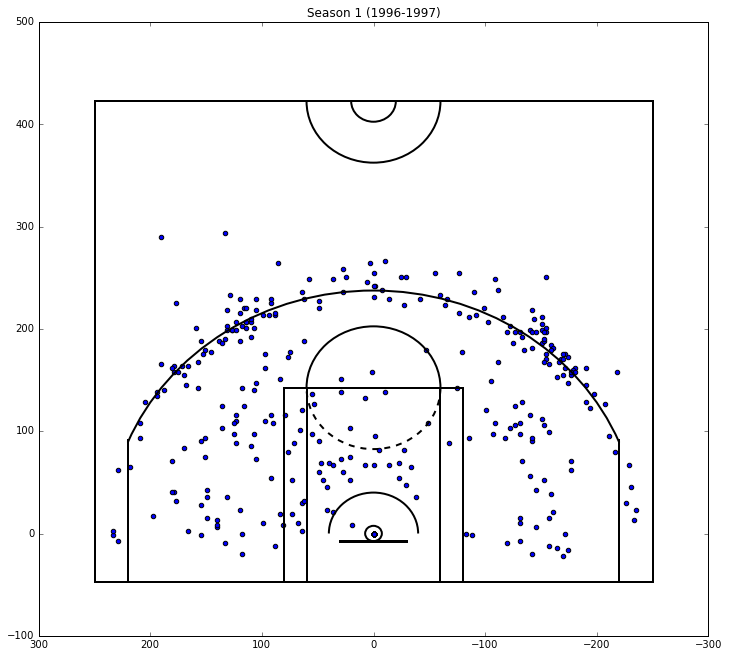

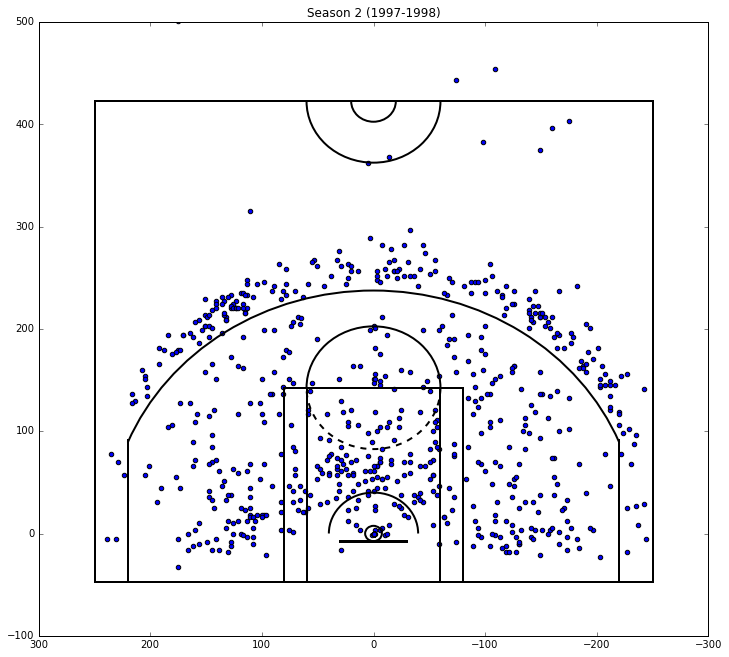

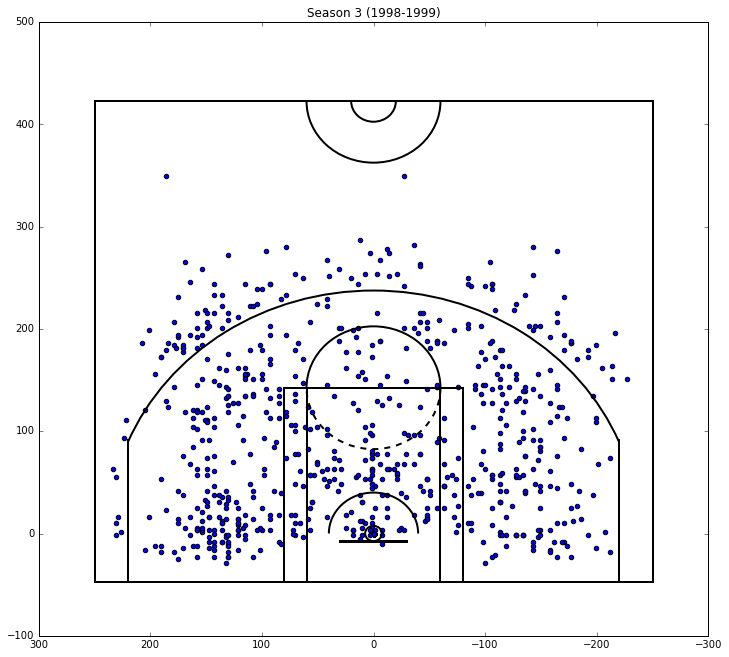

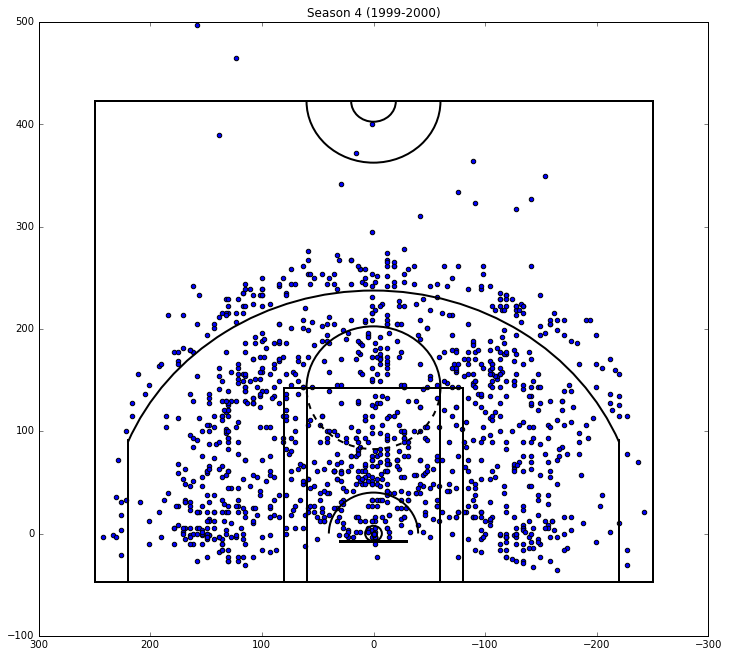

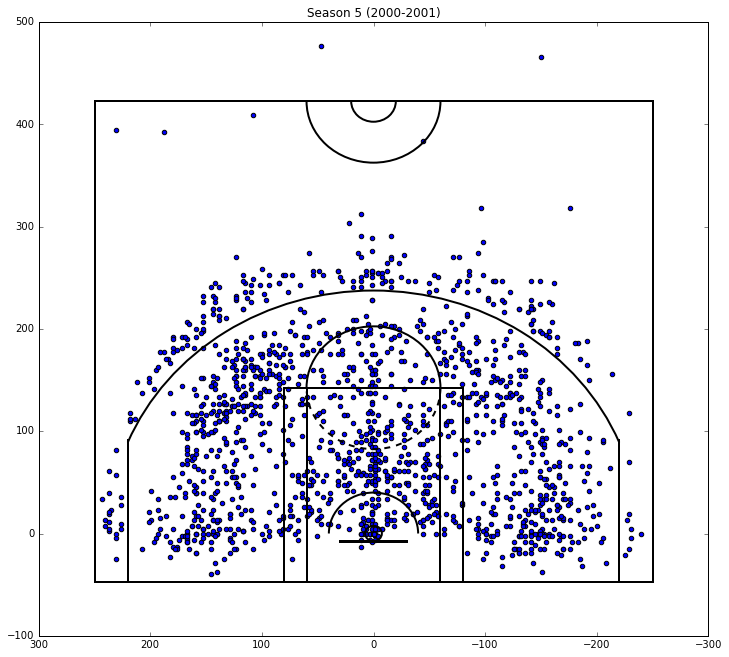

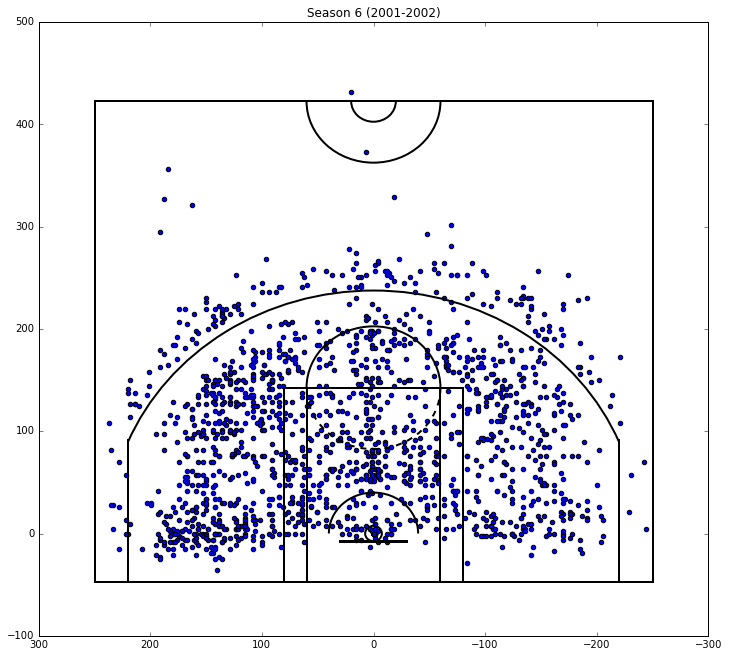

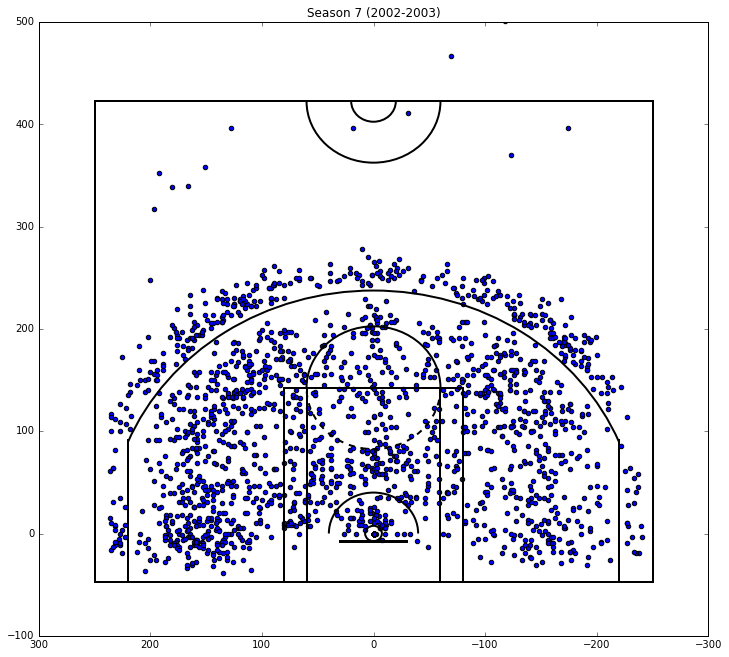

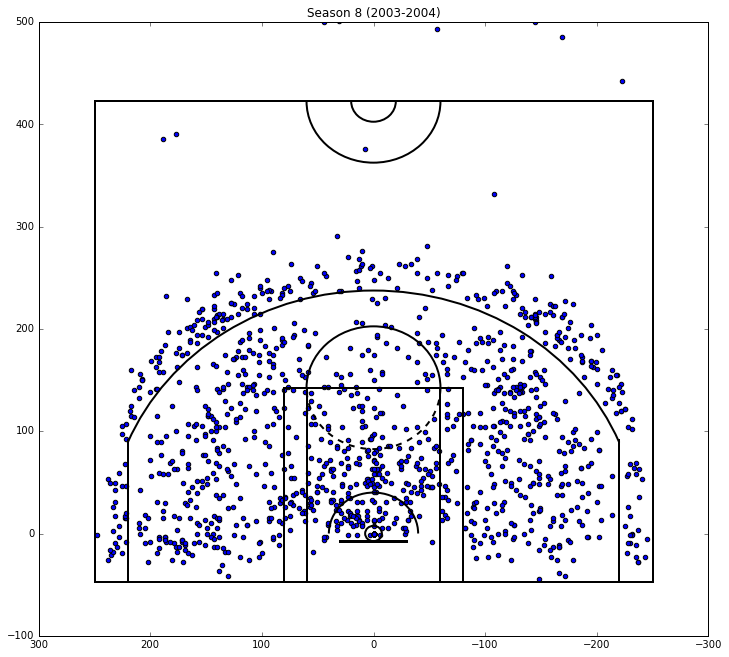

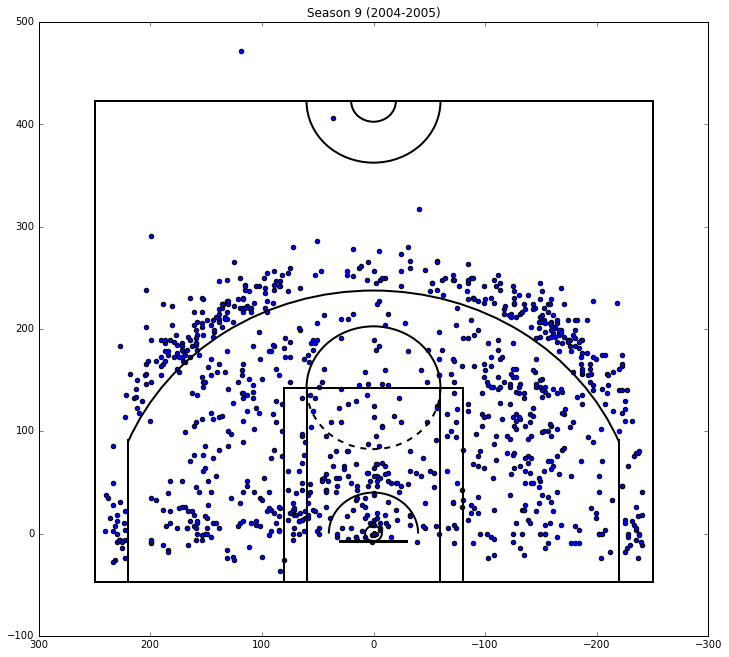

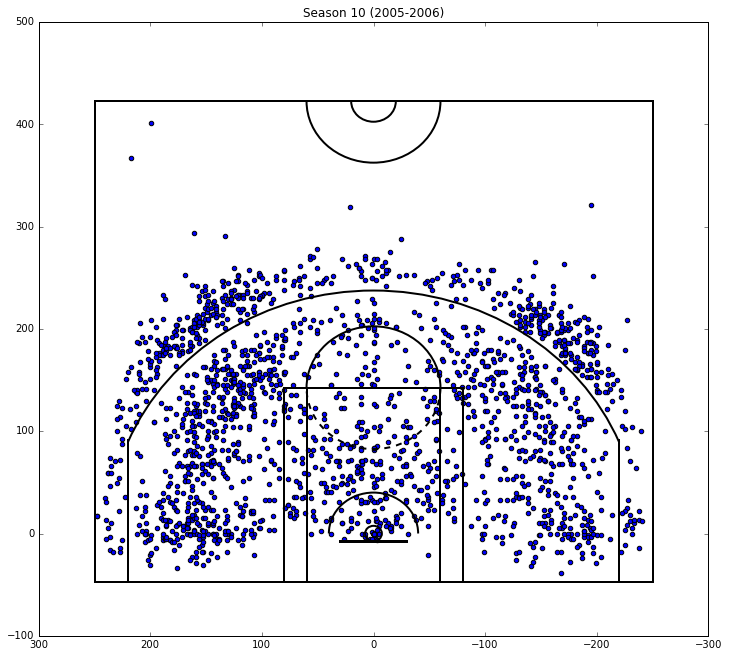

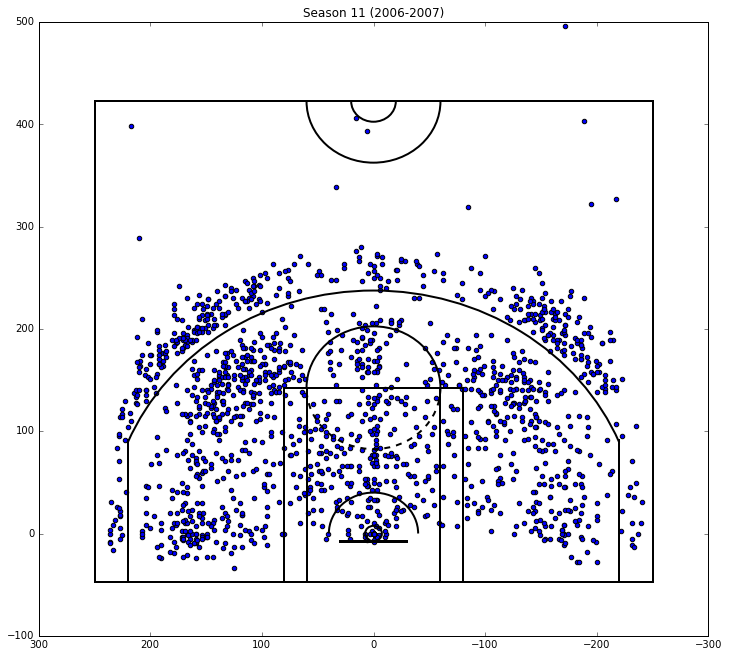

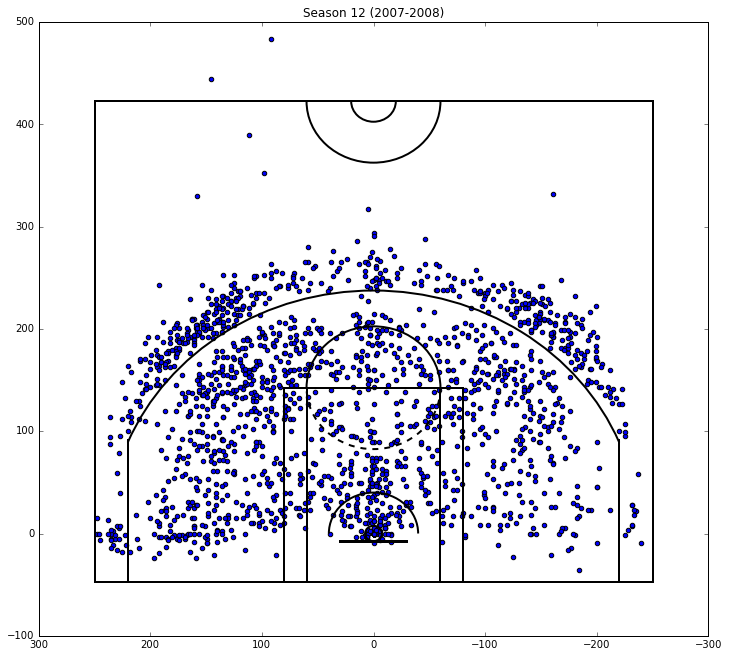

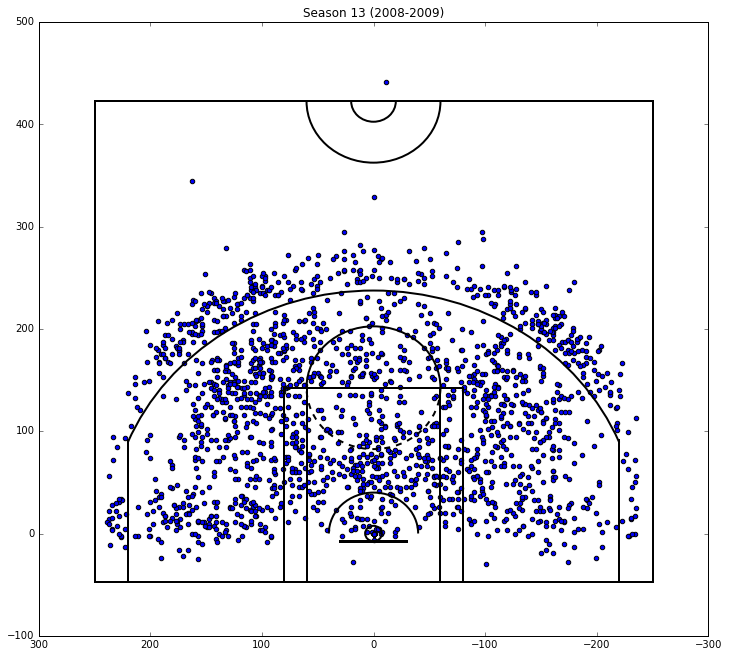

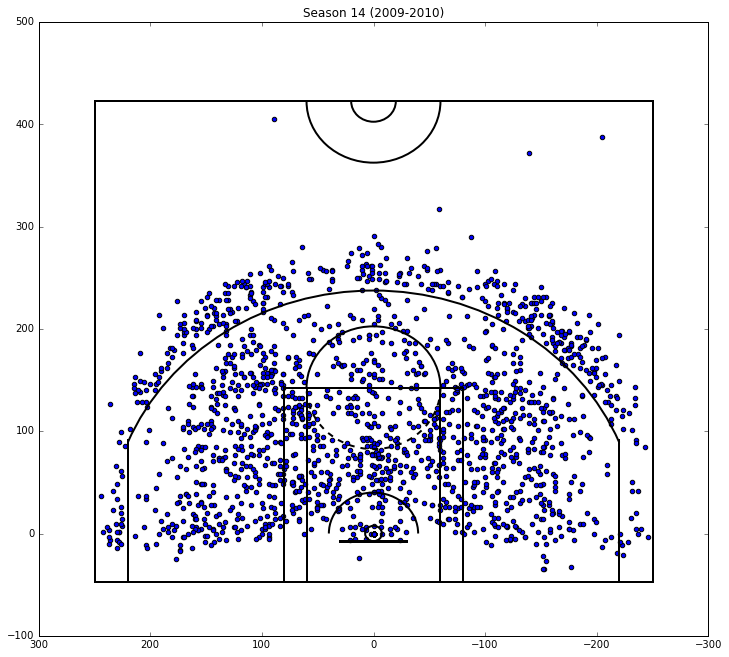

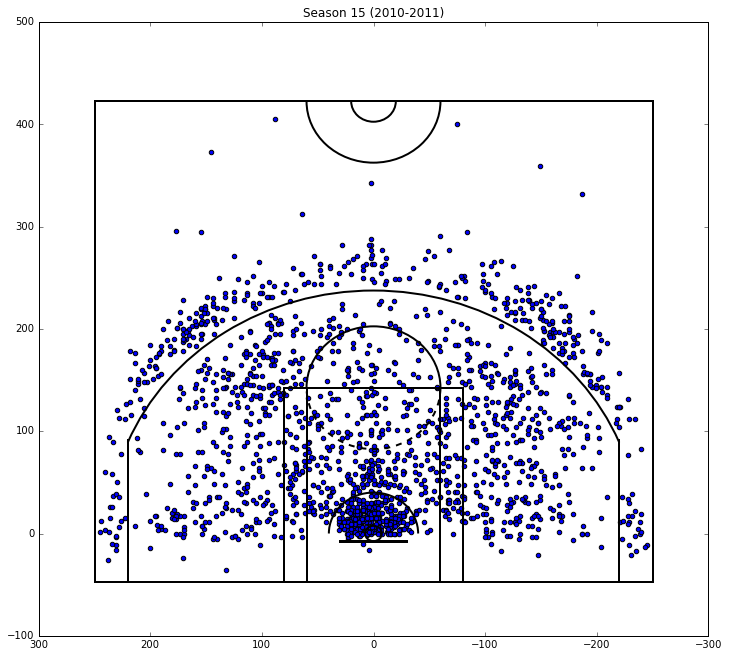

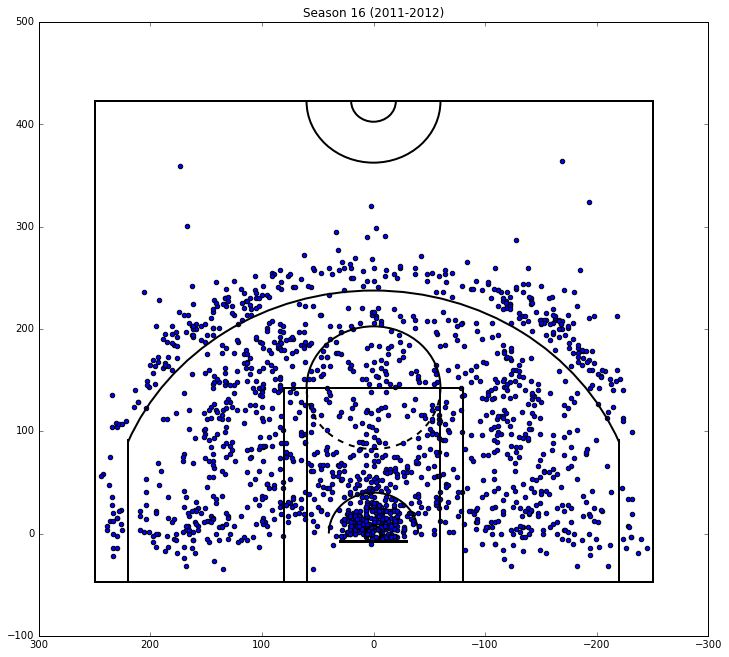

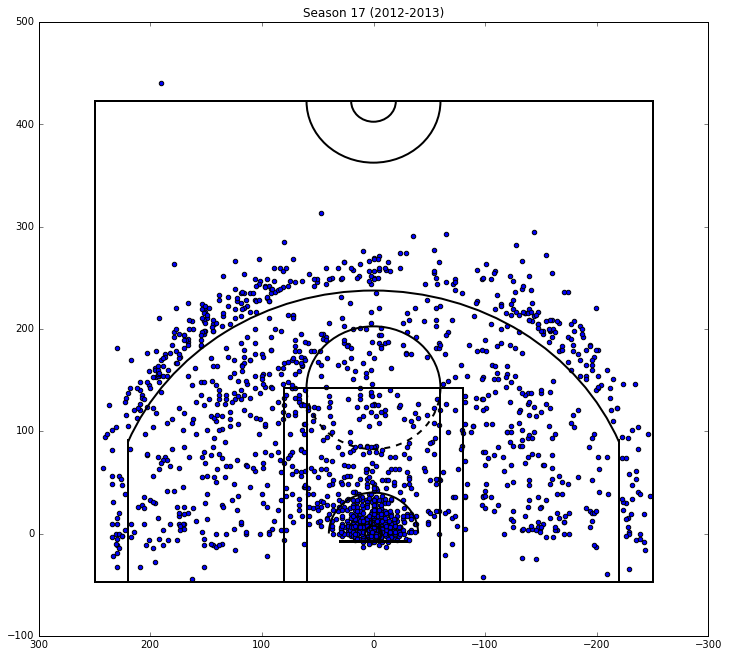

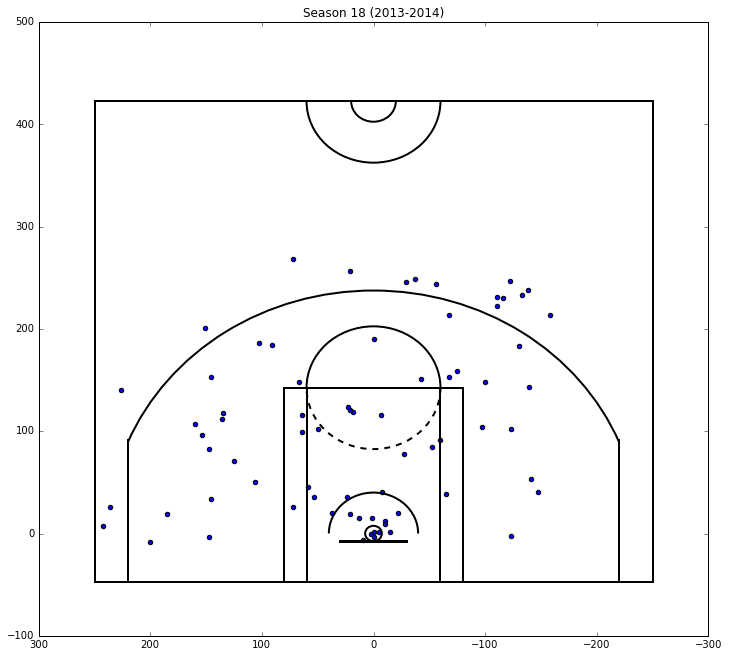

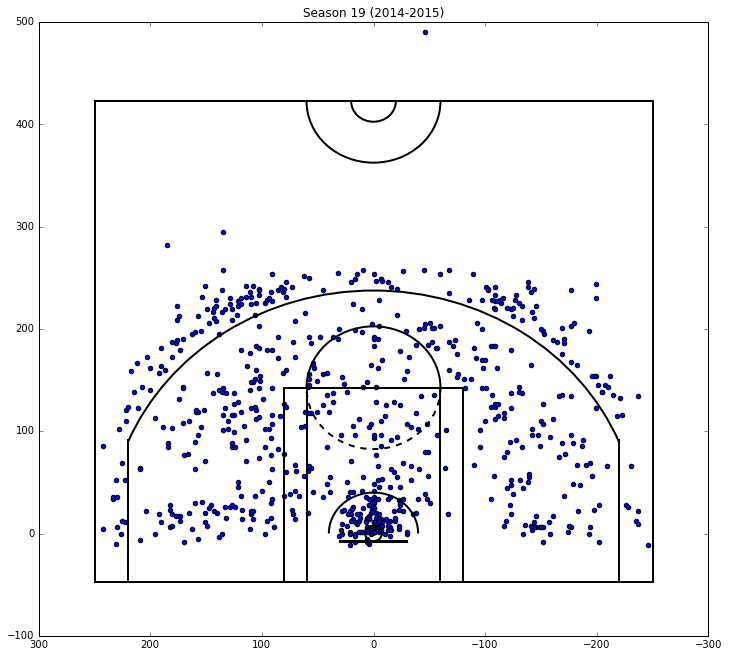

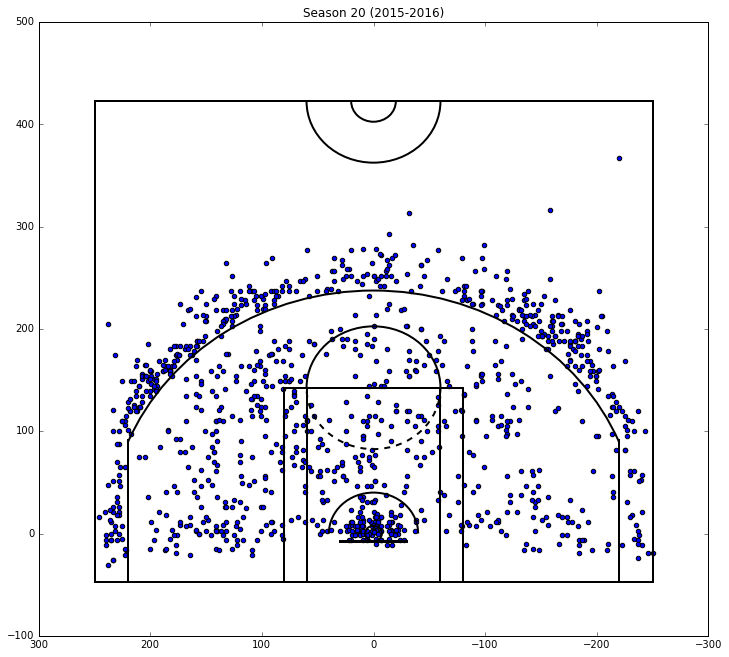

In [52]:
# Just graphing where all the shots took place
for season_num, season in enumerate(seasons):
    # Draw the court
    fig = plt.figure(figsize=(12,11))
    ax = fig.add_subplot(111)
    ax.set_title("Season {} ({}-{})".format(season_num + 1, season_num+1996, season_num+1997))
    ax.scatter(season['loc_x'], season['loc_y'])
    draw_court(ax, outer_lines=True)
    plt.ylim(-100,500)
    plt.xlim(300,-300)

# Where did Kobe make/miss his shots?

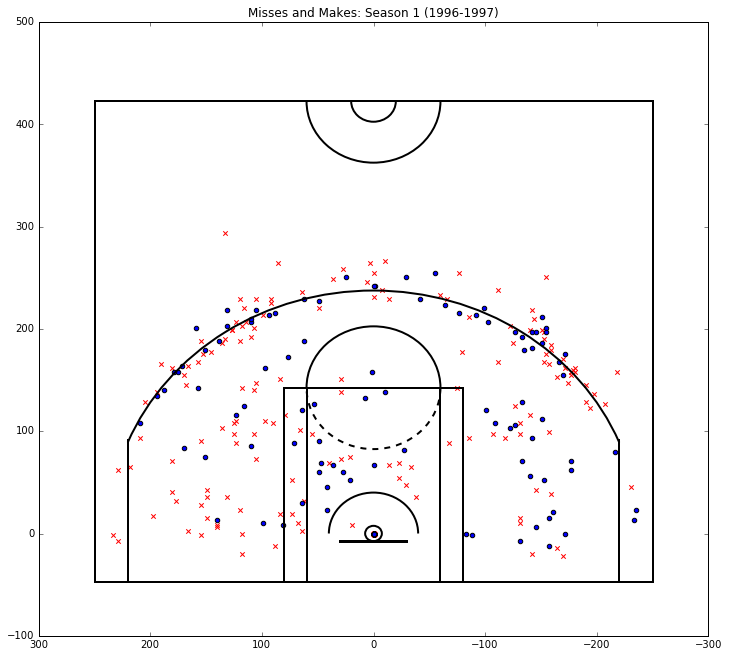

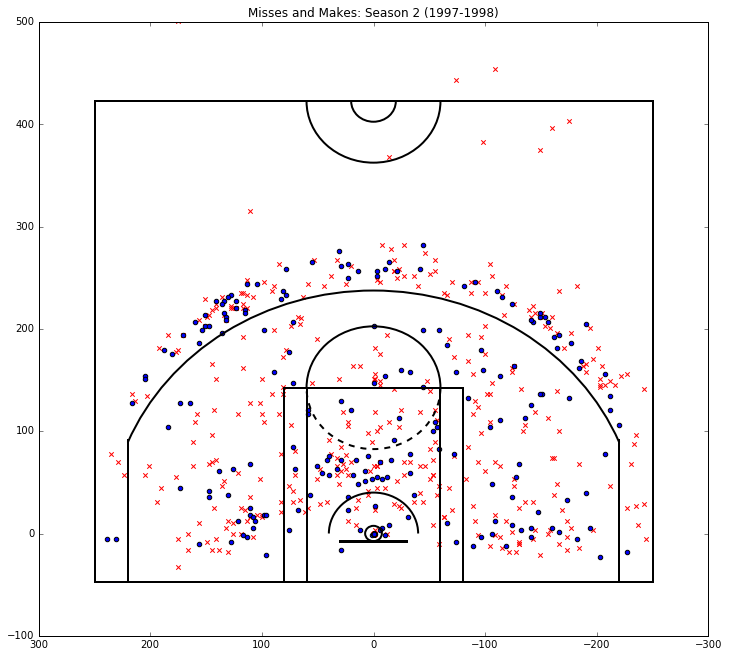

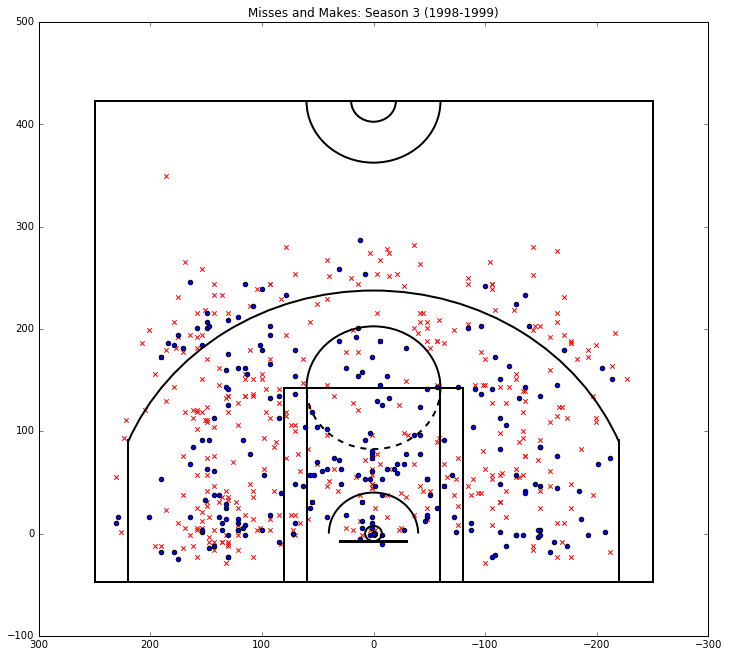

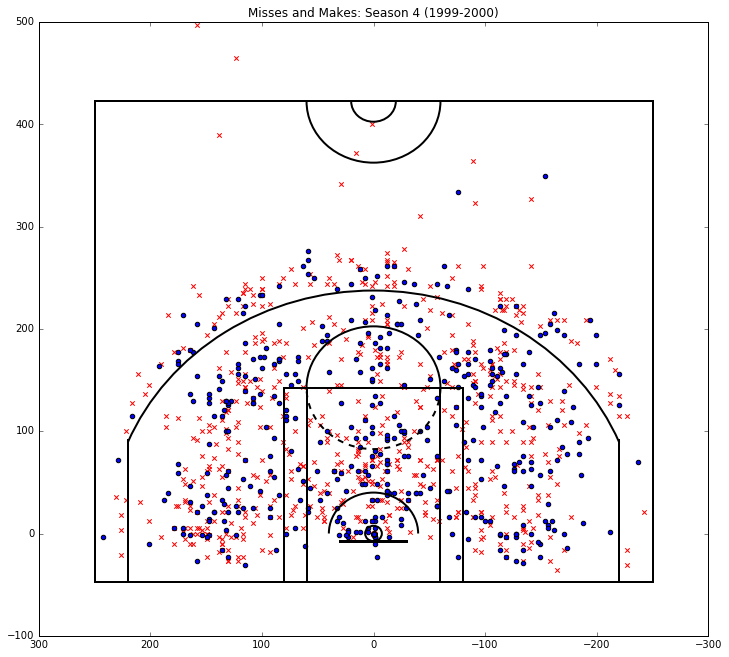

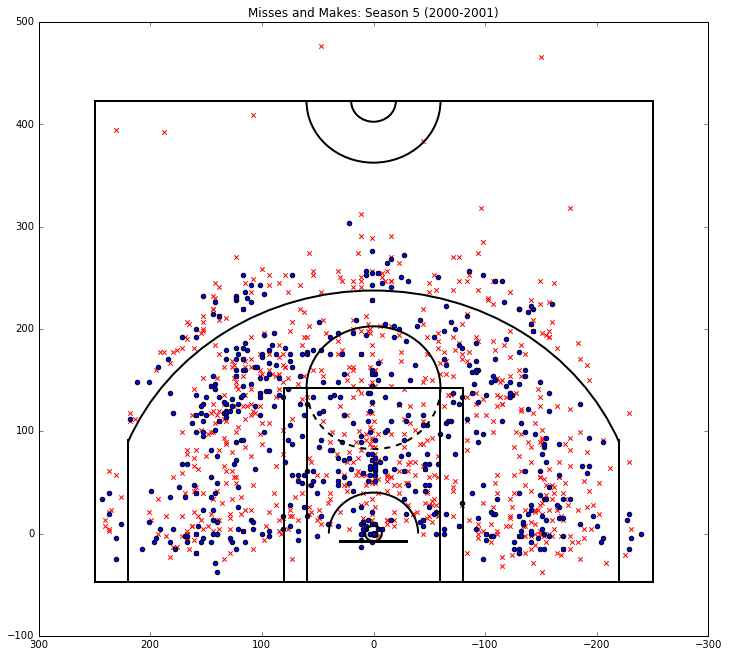

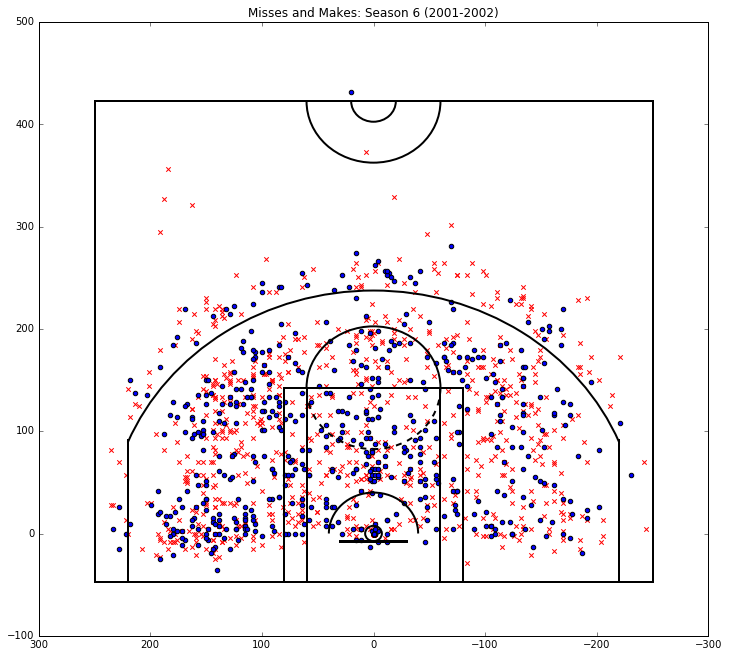

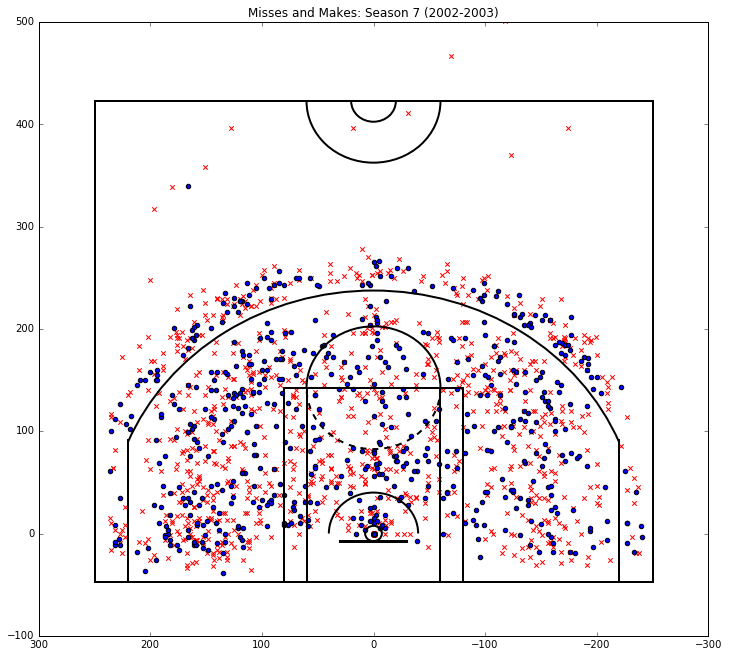

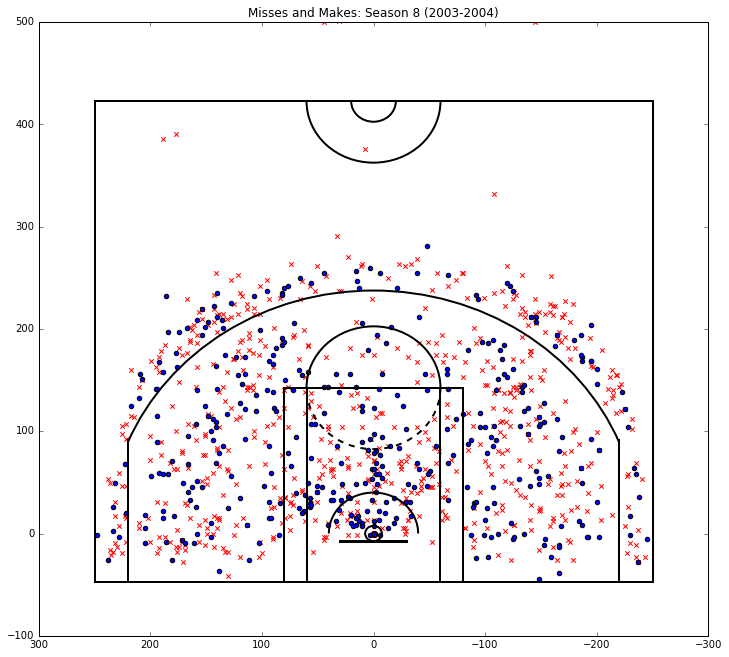

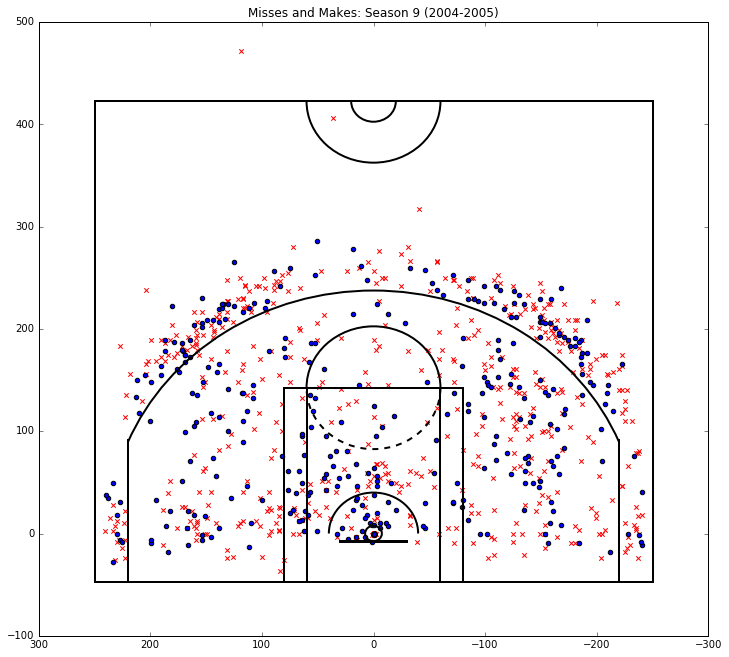

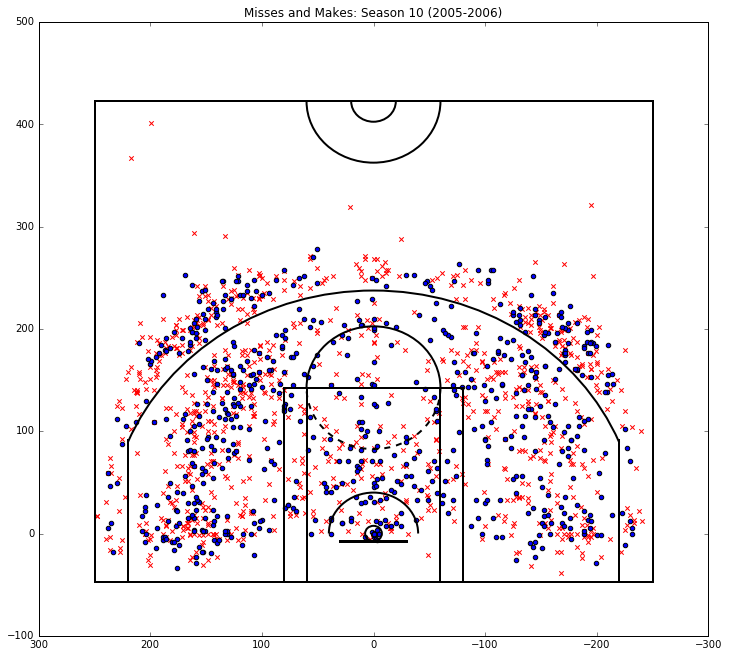

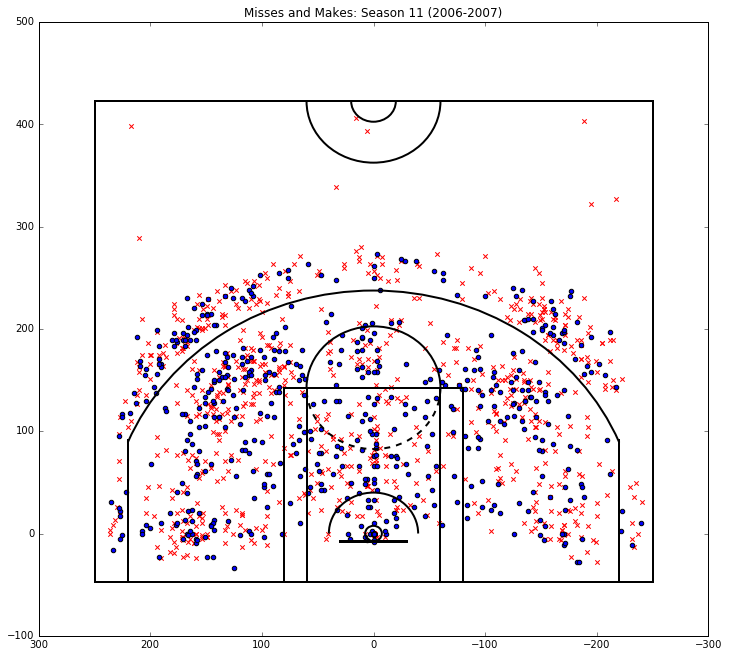

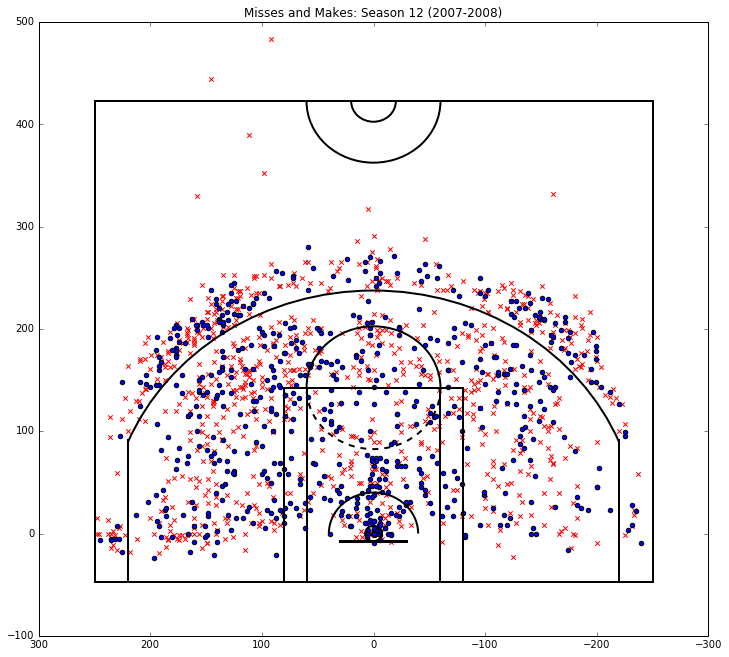

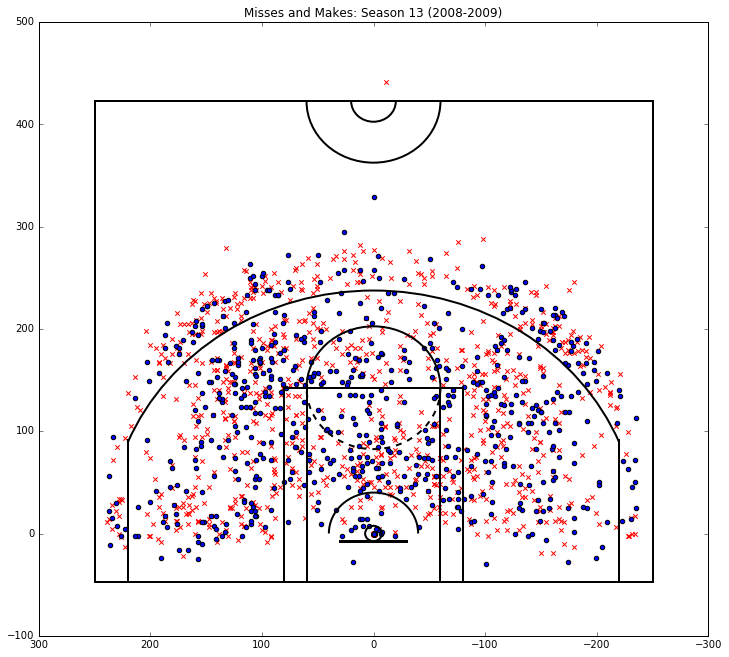

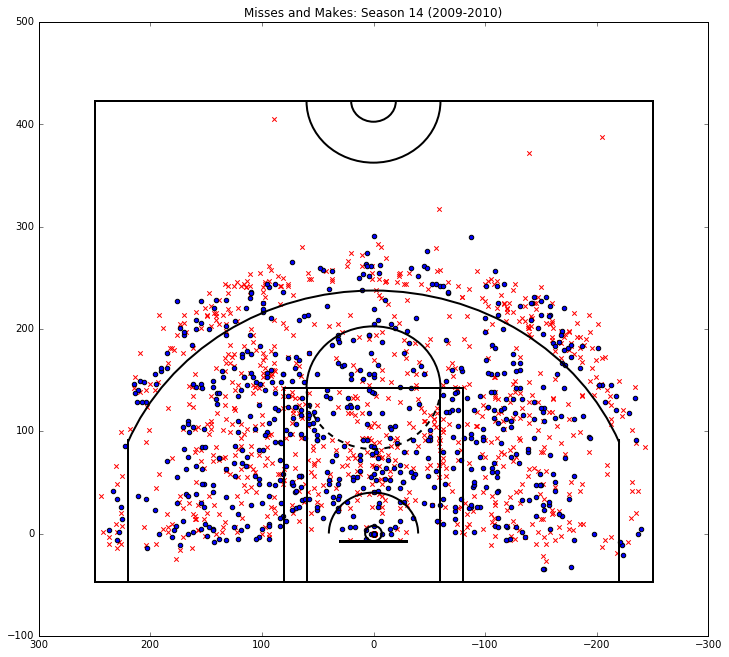

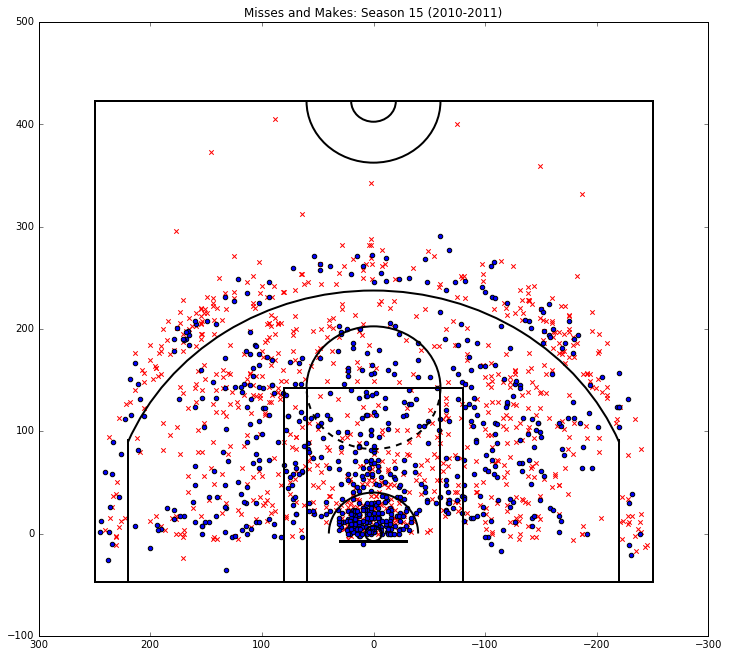

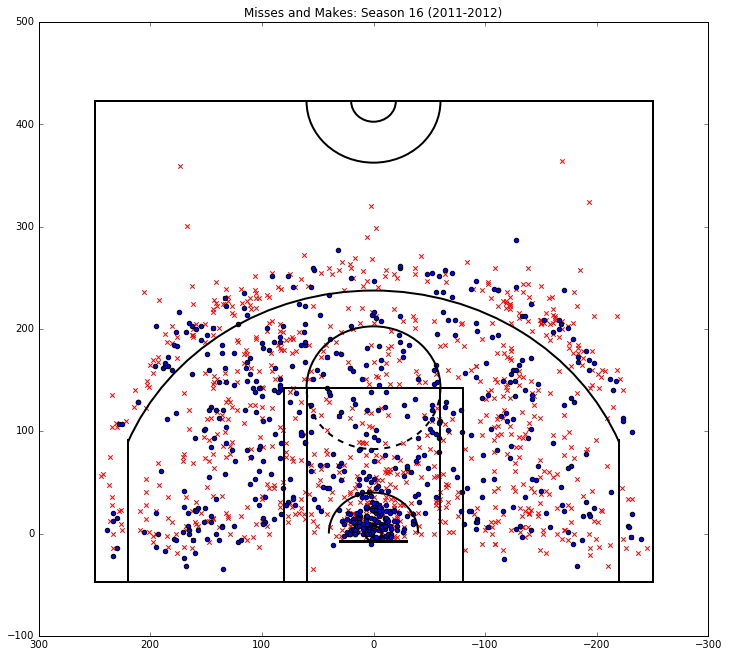

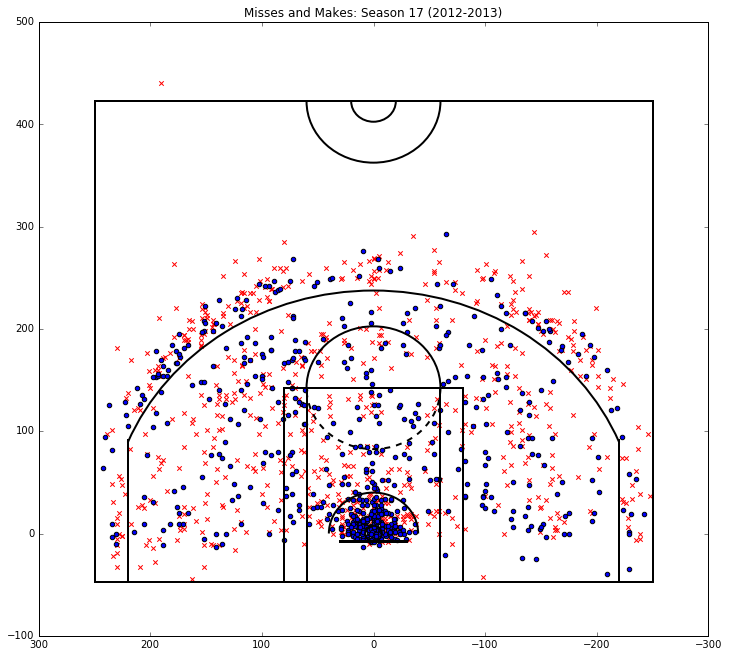

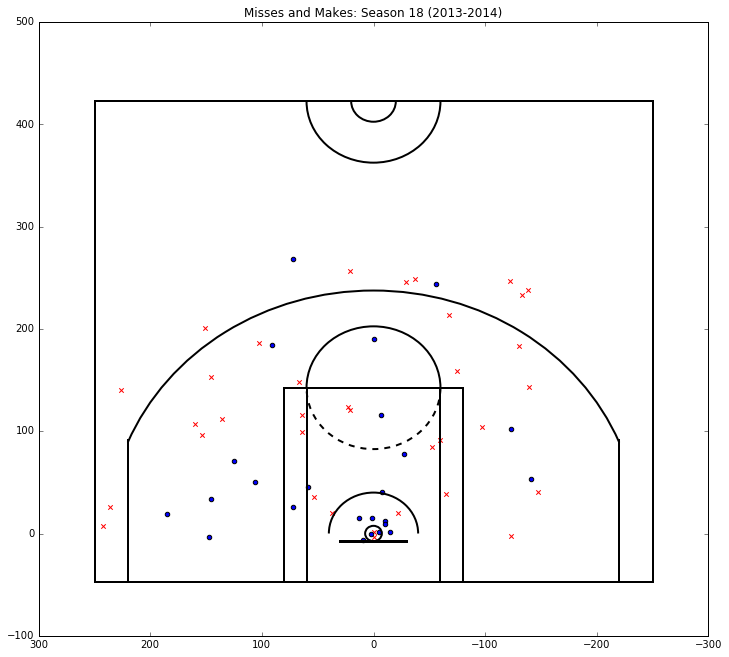

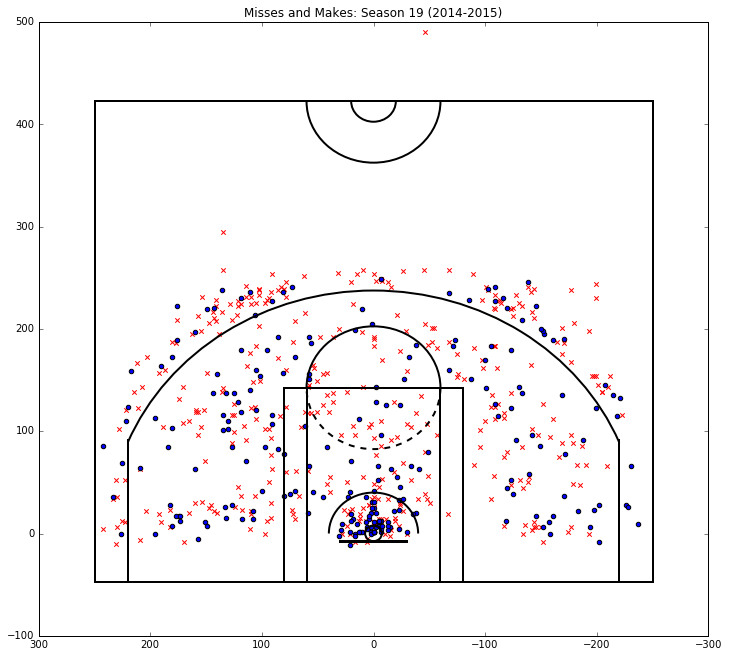

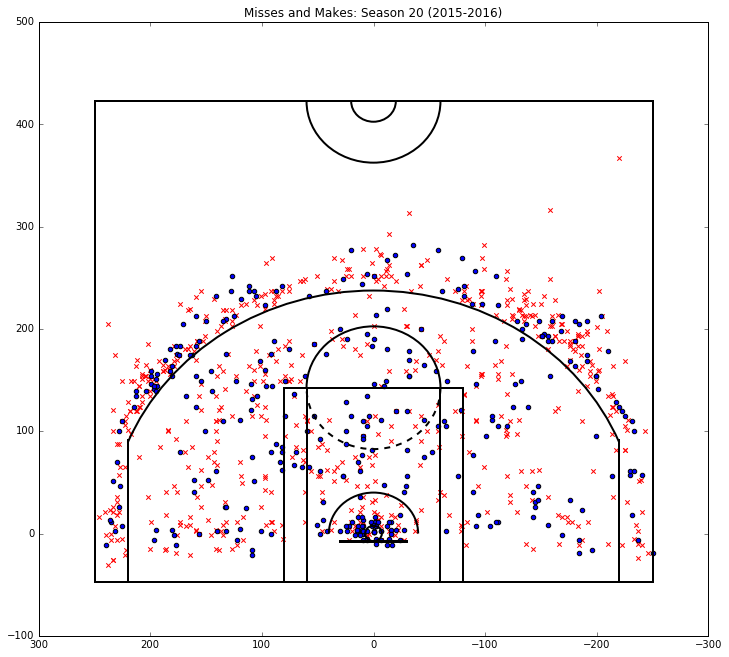

In [53]:
# Let's graph the makes and misses now

for season_num, season in enumerate(seasons):
    misses = season[season['shot_made_flag'] == 0.0]
    makes = season[season['shot_made_flag'] == 1.0]
    
    # Draw the court
    fig = plt.figure(figsize=(12,11))
    ax = fig.add_subplot(111)
    ax.set_title("Misses and Makes: Season {} ({}-{})".format(season_num + 1, season_num+1996, season_num+1997))
    ax.scatter(misses['loc_x'], misses['loc_y'], marker='x', c='red')
    ax.scatter(makes['loc_x'], makes['loc_y'], marker='o', c='blue')
    draw_court(ax, outer_lines=True)
    plt.ylim(-100,500)
    plt.xlim(300,-300)